### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style("darkgrid")
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams["figure.facecolor"] = "#FFE5D4"

In [3]:
df = pd.read_csv("world-happiness-report-2021.csv")
df.head()

,Country name,Regional indicator,Happiness score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


### Data Cleaning

In [5]:
# Removing unwanted columns
df_columns =["Country name","Regional indicator","Happiness score","Logged GDP per capita","Social support",
             "Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]

In [6]:
df = df[df_columns].copy()

In [66]:
# Renaming columns
happy_df = df.rename({"Country name":"country_name","Regional indicator":"regional_indicator",
                        "Happiness score":"happiness_score","Logged GDP per capita":"logged_GDP_per_capita",
                       "Social support":"social_support","Healthy life expectancy":"healthy_life_expectancy",
                       "Freedom to make life choices":"freedom_to_make_life_choices","Generosity":"generosity",
                       "Perceptions of corruption":"perceptions_of_corruption"},axis = 1)
happy_df.head()

,country_name,regional_indicator,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [13]:
#checking null values
happy_df.isnull().sum()

country_name                     0
regional_indicator               0
happiness_score                  0
logged_GDP_per_capita            0
social_support                   0
healthy_life_expectancy          0
freedom_to_make_life_ choices    0
generosity                       0
perceptions_of_corruption        0
dtype: int64

### Plot b/w Happiness and GDP

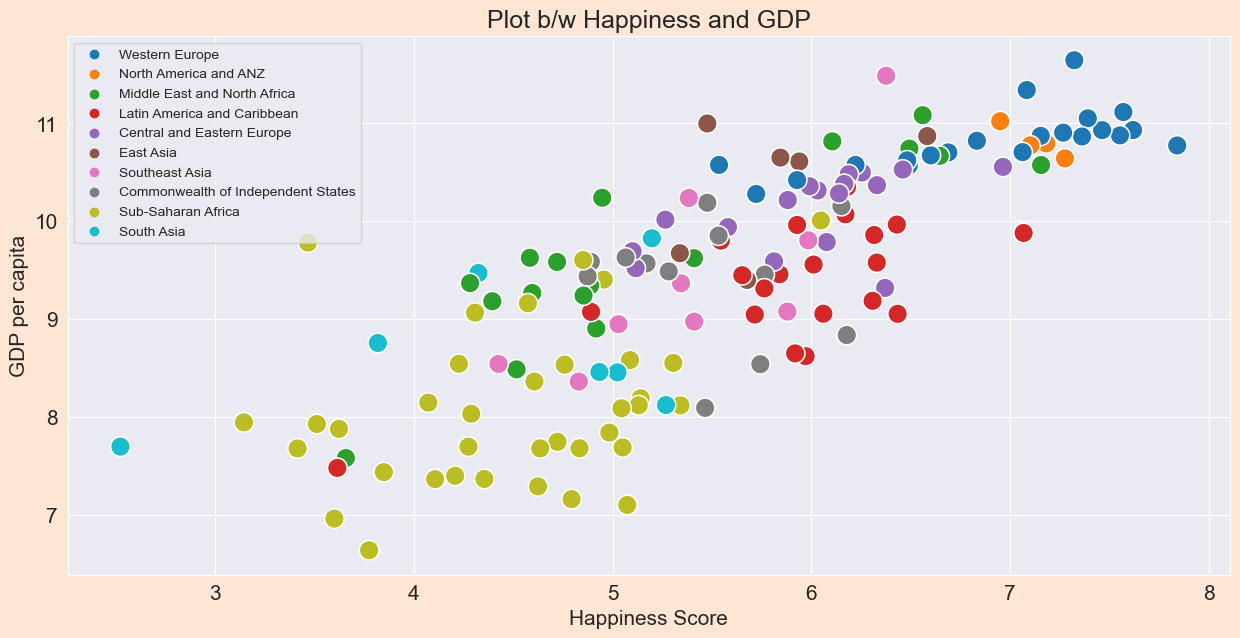

In [15]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title("Plot b/w Happiness and GDP")
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.logged_GDP_per_capita,
               hue = happy_df.regional_indicator, s = 200);
plt.legend(loc = "upper left",fontsize = 10)
plt.xlabel("Happiness Score")
plt.ylabel("GDP per capita")
plt.show()

### GDP by Region

In [37]:
gdp_region = happy_df.groupby("regional_indicator")[["logged_GDP_per_capita"]].sum()
gdp_region

,logged_GDP_per_capita
regional_indicator,
Central and Eastern Europe,171.854
Commonwealth of Independent States,112.822
East Asia,62.206
Latin America and Caribbean,187.400
Middle East and North Africa,164.324
North America and ANZ,43.238
South Asia,60.778
Southeast Asia,84.793
Sub-Saharan Africa,290.707


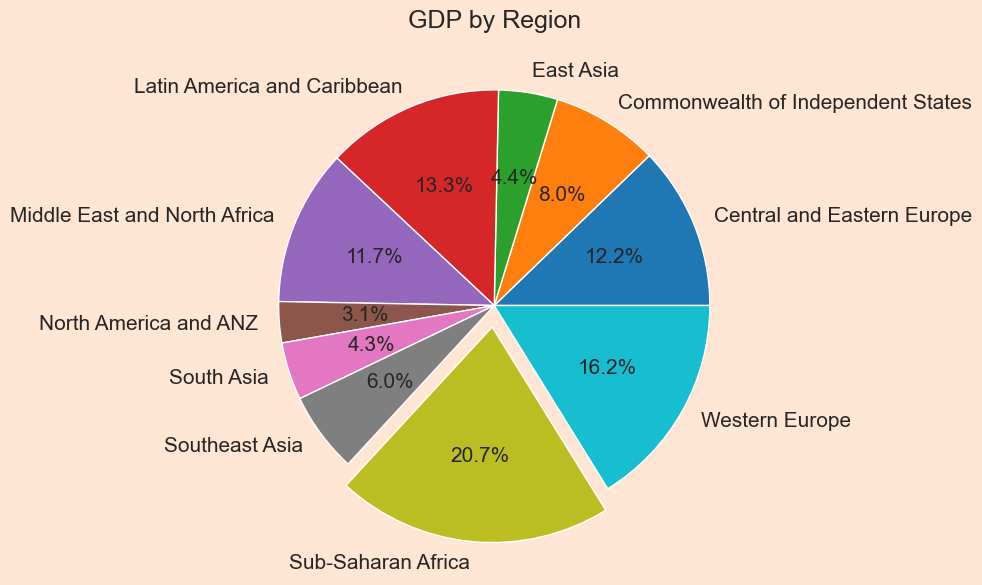

In [23]:
gdp_region.plot.pie(autopct = "%1.1f%%",explode = [0,0,0,0,0,0,0,0,0.1,0])
plt.title("GDP by Region")
plt.ylabel("")
plt.show()

### Total Countries in each Region

In [24]:
total_countries = happy_df.groupby("regional_indicator")["country_name"].count()
total_countries

regional_indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: country_name, dtype: int64

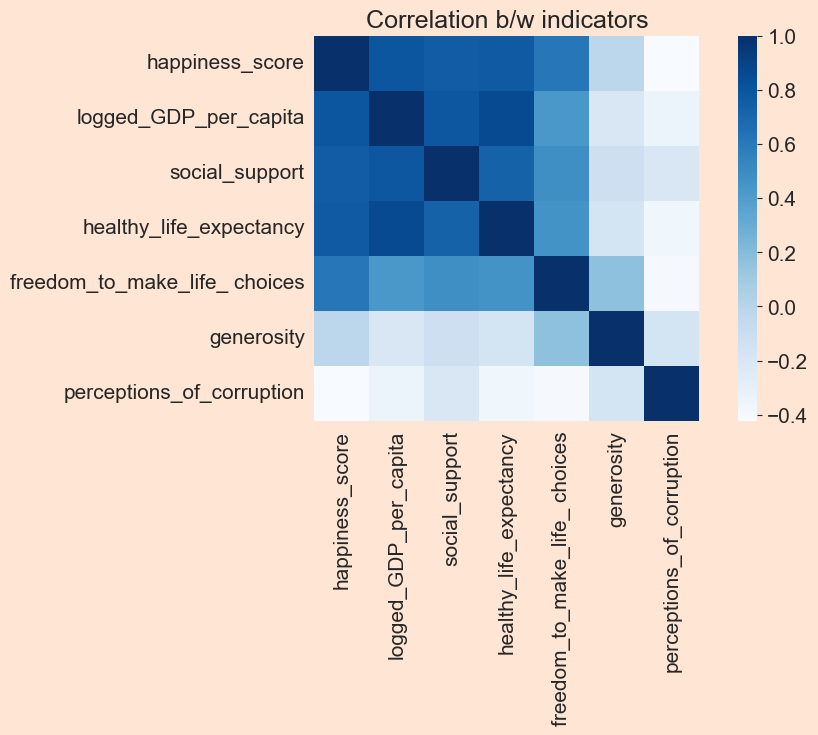

In [33]:
numeric_cols = happy_df.select_dtypes(include = np.number)

cor = numeric_cols.corr(method = "pearson")
f,ax = plt.subplots(figsize = (10,5))
sns.heatmap(cor, mask = np.zeros_like(cor,dtype = np.number),
            cmap = "Blues",square = True,ax = ax)
plt.title("Correlation b/w indicators")
plt.show()

### Corruption in Region

In [36]:
corruption = happy_df.groupby("regional_indicator")[["perceptions_of_corruption"]].mean()
corruption

,perceptions_of_corruption
regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


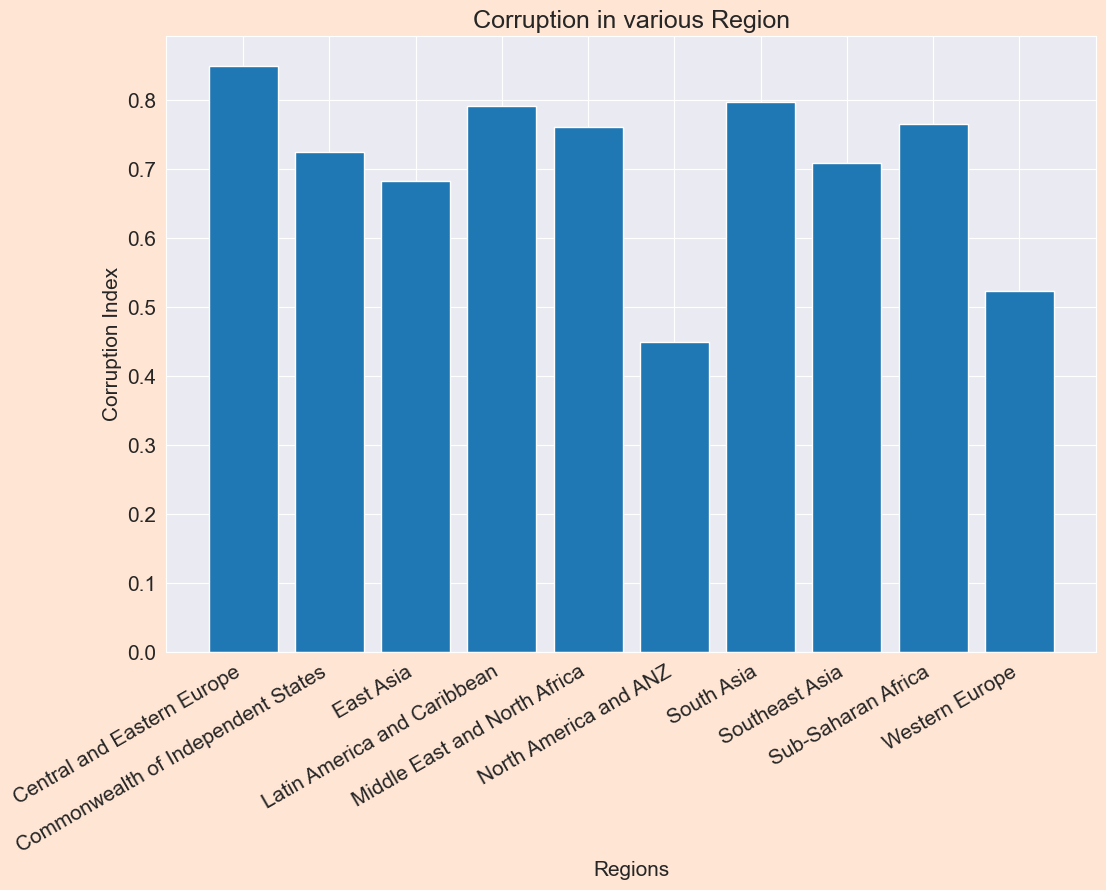

In [39]:
plt.rcParams["figure.figsize"] = (12,8)
plt.title("Corruption in various Region")
plt.xlabel("Regions",fontsize = 15)
plt.ylabel("Corruption Index",fontsize = 15)
plt.xticks(rotation = 30, ha = "right")
plt.bar(corruption.index,corruption.perceptions_of_corruption)
plt.show()

### Life Expectancy of  Top and Bottom 10 Happiest Countries

In [40]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

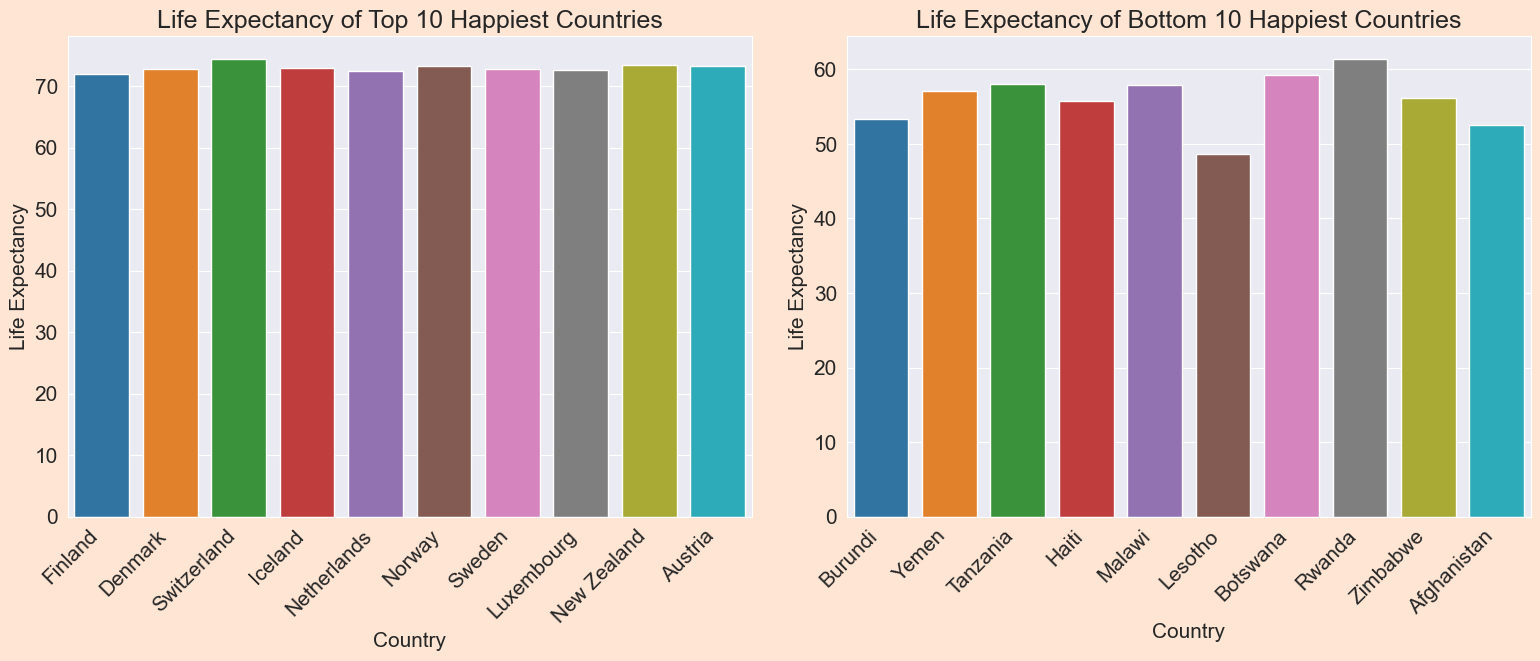

In [63]:
fig, axes = plt.subplots(1, 2, figsize = (16, 6))
plt.tight_layout(pad = 2)
xlabels = top_10.country_name
sns.barplot(x = top_10.country_name, y = top_10.healthy_life_expectancy, ax = axes[0])
axes[0].set_title("Life Expectancy of Top 10 Happiest Countries")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Life Expectancy")
axes[0].set_xticklabels(xlabels,rotation = 45, ha = "right")

xlabels = bottom_10.country_name
sns.barplot(x = bottom_10.country_name, y = bottom_10.healthy_life_expectancy, ax = axes[1])
axes[1].set_title("Life Expectancy of Bottom 10 Happiest Countries")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Life Expectancy")
axes[1].set_xticklabels(xlabels,rotation = 45, ha = "right")
plt.show()

### Plot b/w Happiness & Freedom to make life choices 

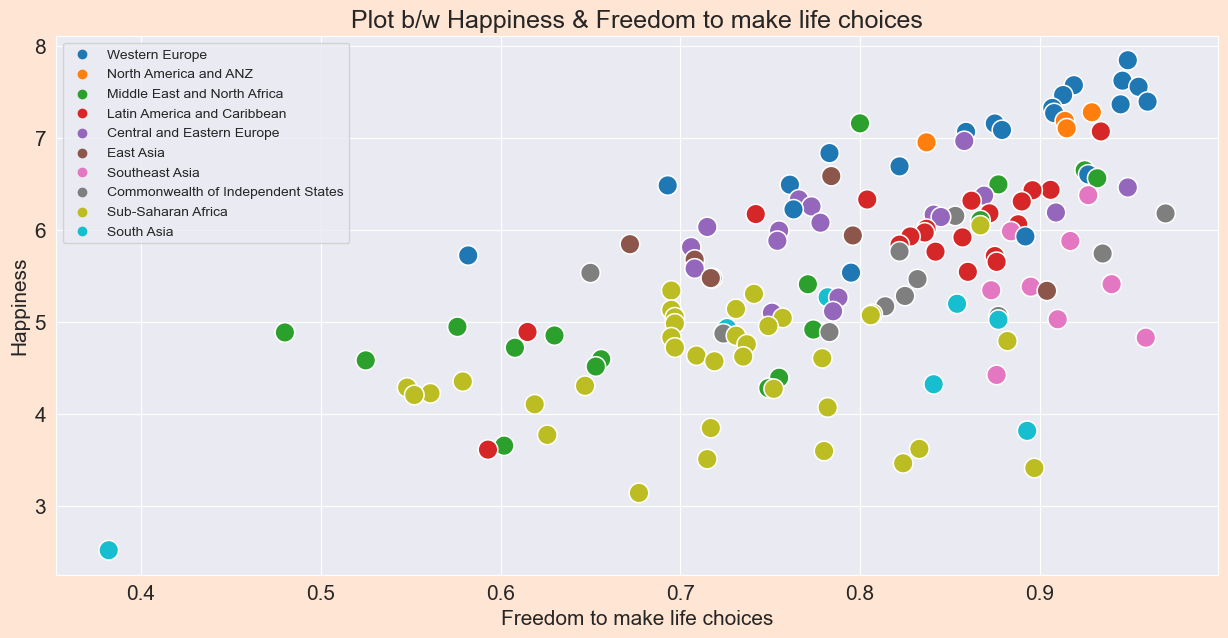

In [68]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title("Plot b/w Happiness & Freedom to make life choices")
sns.scatterplot(x = happy_df.freedom_to_make_life_choices, y = happy_df.happiness_score,
               hue = happy_df.regional_indicator, s = 200);
plt.legend(loc = "upper left",fontsize = 10)
plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness")
plt.show()

### Top 10 Most Corrupt Countries

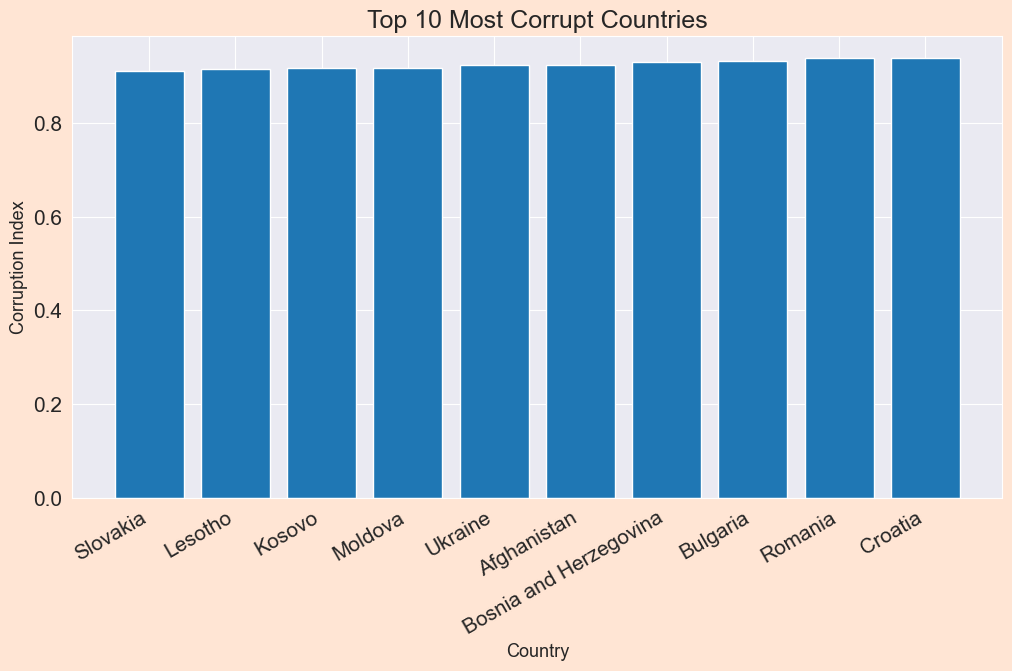

In [71]:
country = happy_df.sort_values("perceptions_of_corruption").tail(10)
plt.rcParams["figure.figsize"] = (12,6)
plt.title("Top 10 Most Corrupt Countries")
plt.xlabel("Country",fontsize = 13)
plt.ylabel("Corruption Index",fontsize = 13)
plt.xticks(rotation = 30, ha = "right")
plt.bar(country.country_name,country.perceptions_of_corruption)
plt.show()

### Plot b/w Happiness & Corruption

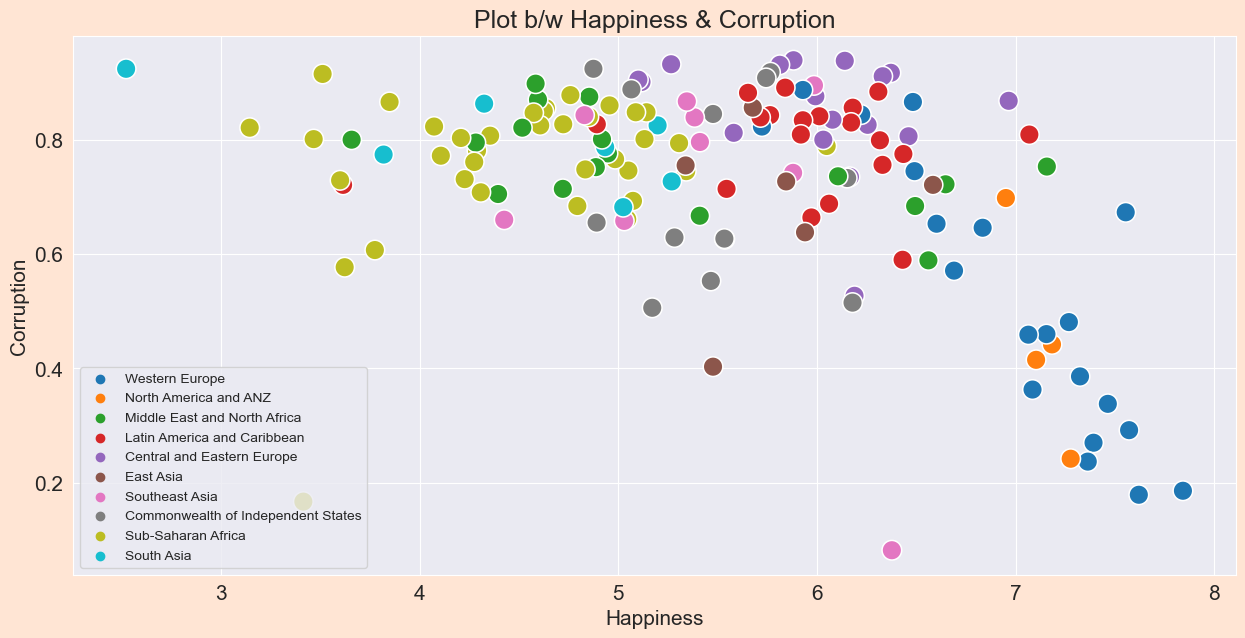

In [73]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title("Plot b/w Happiness & Corruption")
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.perceptions_of_corruption,
               hue = happy_df.regional_indicator, s = 200);
plt.legend(loc = "lower left",fontsize = 14)
plt.xlabel("Happiness")
plt.ylabel("Corruption")
plt.show()